<a href="https://colab.research.google.com/github/karabomaboka/60DaysDailyCoding_Challenge/blob/master/Coronavirus_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [169]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 03-05-2020.csv to 03-05-2020 (2).csv
User uploaded file "03-05-2020.csv" with length 10684 bytes


In [0]:
data=pd.read_csv('03-05-2020.csv')

In [171]:
data.columns

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'Latitude', 'Longitude'],
      dtype='object')

In [172]:
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,2020-03-05T14:53:03,67466,2902,40592,30.9756,112.2707
1,NaN,South Korea,2020-03-05T09:03:09,6088,35,41,36.0000,128.0000
2,NaN,Italy,2020-03-05T17:43:03,3858,148,414,43.0000,12.0000
3,NaN,Iran,2020-03-05T13:43:04,3513,107,739,32.0000,53.0000
4,Guangdong,Mainland China,2020-03-05T09:23:03,1351,7,1181,23.3417,113.4244


In [173]:
data.shape

(173, 8)

In [174]:
data.dtypes

Province/State     object
Country/Region     object
Last Update        object
Confirmed           int64
Deaths              int64
Recovered           int64
Latitude          float64
Longitude         float64
dtype: object

In [175]:
data.isnull().sum()

Province/State    82
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
Latitude           0
Longitude          0
dtype: int64

In [176]:
data.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,173.000000,173.000000,173.000000,173.000000,173.000000
mean,565.815029,19.352601,310.965318,31.551852,16.022606
std,5155.797934,220.894659,3088.222204,21.219194,88.476001
min,0.000000,0.000000,0.000000,-41.454500,-123.869500
25%,1.000000,0.000000,0.000000,27.610400,-73.794900
50%,5.000000,0.000000,0.000000,36.000000,19.503300
75%,75.000000,1.000000,9.000000,43.073100,106.874800
max,67466.000000,2902.000000,40592.000000,64.963100,174.886000


In [177]:
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,2020-03-05T14:53:03,67466,2902,40592,30.9756,112.2707
1,NaN,South Korea,2020-03-05T09:03:09,6088,35,41,36.0000,128.0000
2,NaN,Italy,2020-03-05T17:43:03,3858,148,414,43.0000,12.0000
3,NaN,Iran,2020-03-05T13:43:04,3513,107,739,32.0000,53.0000
4,Guangdong,Mainland China,2020-03-05T09:23:03,1351,7,1181,23.3417,113.4244


In [178]:
data.groupby('Last Update')['Confirmed',	'Deaths','Recovered'].sum()

,Confirmed,Deaths,Recovered
Last Update,,,
2020-02-03T03:53:02,2,0,0
2020-02-08T03:43:03,1,0,1
2020-02-12T06:43:02,1,0,1
2020-02-12T07:43:02,4,1,2
2020-02-12T14:43:03,1,0,1
...,...,...,...
2020-03-05T22:53:03,20,0,1
2020-03-05T23:23:02,576,6,512
2020-03-05T23:33:03,1,0,0


In [179]:
data.groupby('Last Update')['Confirmed','Deaths','Recovered'].max()

,Confirmed,Deaths,Recovered
Last Update,,,
2020-02-03T03:53:02,2,0,0
2020-02-08T03:43:03,1,0,1
2020-02-12T06:43:02,1,0,1
2020-02-12T07:43:02,3,1,1
2020-02-12T14:43:03,1,0,1
...,...,...,...
2020-03-05T22:53:03,20,0,1
2020-03-05T23:23:02,576,6,512
2020-03-05T23:33:03,1,0,0


In [0]:
data_per_day=data.groupby('Last Update')['Confirmed',	'Deaths','Recovered'].sum()

In [181]:
data_per_day.head()

,Confirmed,Deaths,Recovered
Last Update,,,
2020-02-03T03:53:02,2,0,0
2020-02-08T03:43:03,1,0,1
2020-02-12T06:43:02,1,0,1
2020-02-12T07:43:02,4,1,2
2020-02-12T14:43:03,1,0,1


In [182]:
data_per_day.describe()

,Confirmed,Deaths,Recovered
count,115.000000,115.000000,115.000000
mean,851.182609,29.113043,467.800000
std,6556.458563,272.437463,3981.858876
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000
75%,103.500000,1.000000,14.000000
max,69982.000000,2919.000000,42708.000000


In [183]:
data_per_day['Confirmed'].max()

69982

In [184]:
data_per_day['Confirmed'].min()

0

In [185]:
data_per_day['Confirmed'].idxmax()

'2020-03-05T14:53:03'

In [186]:
data_per_day['Confirmed'].idxmin()

'2020-02-29T02:03:10'

In [187]:
data.groupby(['Country/Region'])['Confirmed',	'Deaths','Recovered'].max()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,1,0,0
Algeria,12,0,0
Andorra,1,0,0
Argentina,1,0,0
Armenia,1,0,0
...,...,...,...
UK,115,1,8
US,51,10,2
Ukraine,1,0,0


In [188]:
data.groupby(['Province/State','Country/Region'])['Confirmed',	'Deaths','Recovered'].max()

,,Confirmed,Deaths,Recovered
Province/State,Country/Region,,,
"Montreal, QC",Canada,2,0,0
"Norfolk County, MA",US,1,0,0
Anhui,Mainland China,990,6,970
Beijing,Mainland China,418,8,297
"Bergen County, NJ",US,2,0,0
...,...,...,...,...
Western Australia,Australia,3,1,0
"Williamson County, TN",US,1,0,0
Xinjiang,Mainland China,76,3,70


In [189]:
data['Country/Region'].value_counts()

US                44
Mainland China    31
Australia          8
Canada             4
Philippines        1
                  ..
Macau              1
France             1
Denmark            1
Mexico             1
San Marino         1
Name: Country/Region, Length: 90, dtype: int64

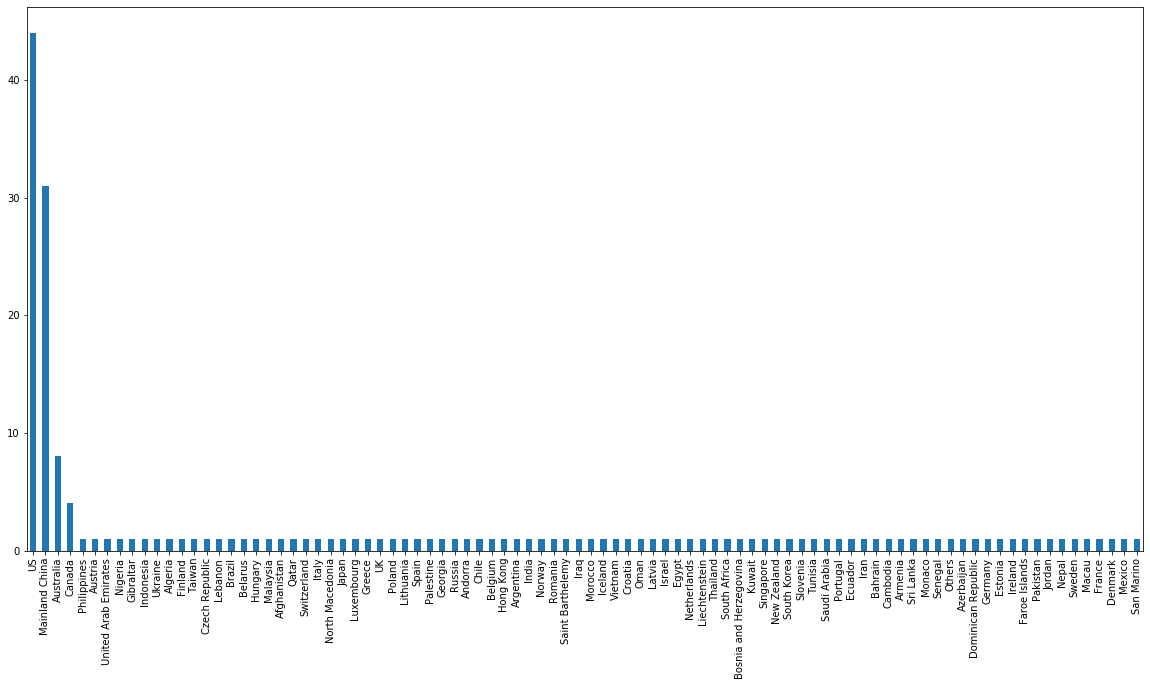

In [190]:
data['Country/Region'].value_counts().plot(kind='bar',figsize=(20,10))

In [191]:
data['Country/Region'].unique()

array(['Mainland China', 'South Korea', 'Italy', 'Iran', 'Others',
       'Germany', 'France', 'Japan', 'Spain', 'Singapore', 'UK',
       'Switzerland', 'Hong Kong', 'Sweden', 'Norway', 'Netherlands',
       'Kuwait', 'Bahrain', 'US', 'Belgium', 'Malaysia', 'Thailand',
       'Taiwan', 'Austria', 'Iraq', 'Iceland', 'Greece', 'India',
       'United Arab Emirates', 'Australia', 'Canada', 'San Marino',
       'Israel', 'Lebanon', 'Oman', 'Vietnam', 'Ecuador', 'Algeria',
       'Czech Republic', 'Finland', 'Croatia', 'Denmark', 'Macau',
       'Portugal', 'Qatar', 'Azerbaijan', 'Belarus', 'Ireland', 'Romania',
       'Mexico', 'Pakistan', 'Saudi Arabia', 'Brazil', 'Chile', 'Georgia',
       'Palestine', 'Russia', 'Senegal', 'Egypt', 'Estonia',
       'New Zealand', 'Philippines', 'Saint Barthelemy',
       'Bosnia and Herzegovina', 'Hungary', 'Indonesia', 'Morocco',
       'Slovenia', 'Afghanistan', 'Andorra', 'Argentina', 'Armenia',
       'Cambodia', 'Dominican Republic', 'Faroe Island

In [192]:
len(data['Country/Region'].unique())

90

In [0]:
#Web scrapping

In [0]:
confirmed_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [195]:
confirmed_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,418,418
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,102


In [0]:
cols =confirmed_data.keys()

In [0]:
import random
import math
import time

In [0]:
confirmed = confirmed_data.loc[:, cols[4]:cols[-1]]
deaths = deaths_data.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_data.loc[:, cols[4]:cols[-1]]

In [0]:
dates = confirmed.keys()
world_cases =[]
total_deaths =[]
mortality_rate= []
total_recovered =[]

for i in dates:
  confirmed_sum= confirmed[i].sum()
  death_sum=deaths[i].sum()
  recovered_sum= recoveries[i].sum()
  world_cases.append(confirmed_sum)
  total_deaths.append(death_sum)
  mortality_rate.append(death_sum/confirmed_sum)
  total_recovered.append(recovered_sum)

In [0]:
days_since_1_22= np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime

In [0]:
days_in_future =3
future_forecast =np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)

In [0]:
start ='1/22/2020'
start_date =datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast=[]
for i in range(len(future_forecast)):
  future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
  adjusted_dates = future_forecast_dates[:-3] 

In [0]:
X_train_confirmed, X_test_confirmed,y_train_confirmed, y_test_confirmed=train_test_split(days_since_1_22,world_cases,test_size=0.2,shuffle=False)

In [205]:
kernel =['linear','rbf']
c=[0.01,0.1,1,10]
gamma=[0.01,0.1,1]
epsilon=[0.01,0.1,1]
shrinking=[True,False]
svm_grid={'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}

svm=SVR()
svm_search=RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',
                              cv=3,return_train_score=True,n_jobs=-1, n_iter=30,verbose=1)
svm_search.fit(X_train_confirmed,y_train_confirmed)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=30, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['linear', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [206]:
svm_search.best_params_

{'C': 10, 'epsilon': 1, 'gamma': 1, 'kernel': 'linear', 'shrinking': False}

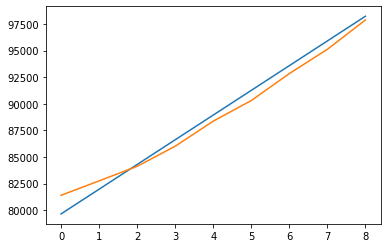

In [207]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)

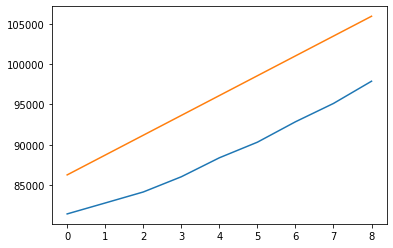

In [208]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

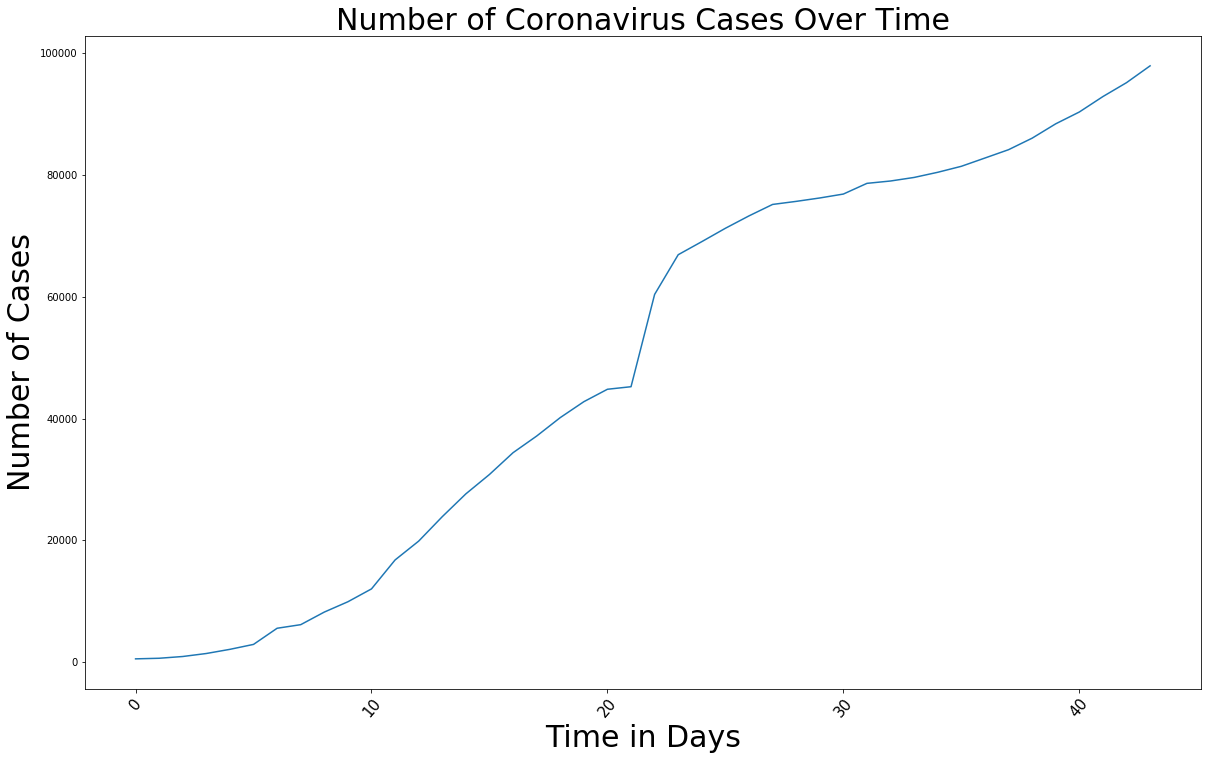

In [211]:
plt.figure(figsize=(20, 12))
plt.plot( world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

NameError: ignored

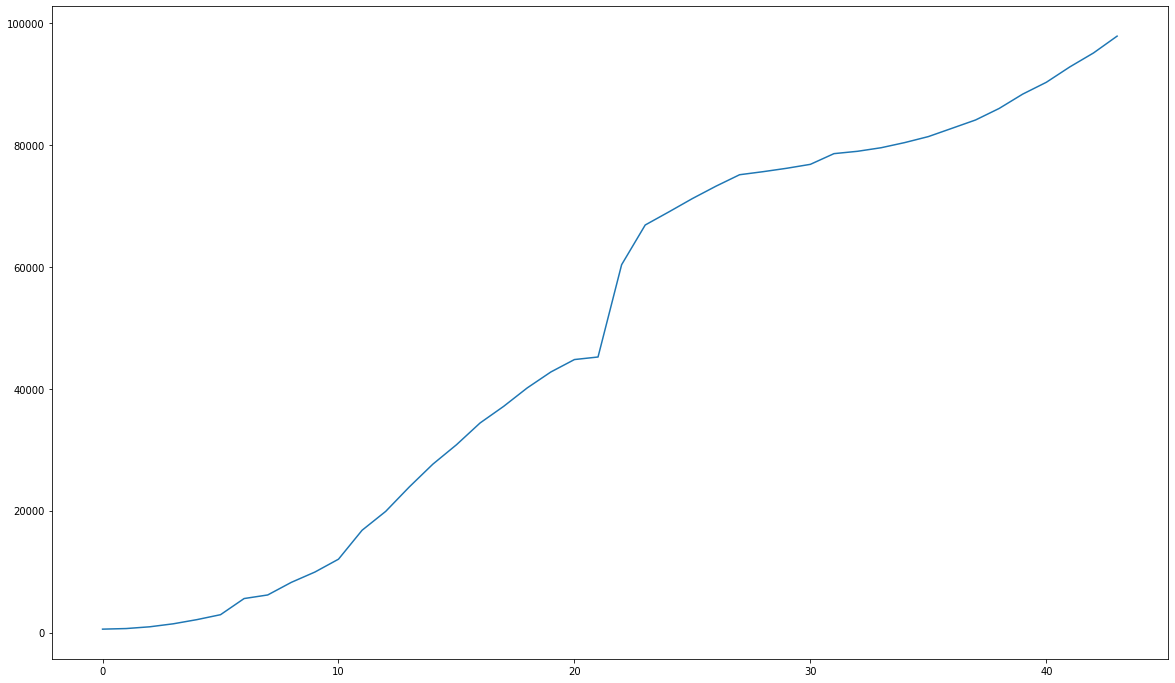

In [212]:
plt.figure(figsize=(20, 12))
plt.plot(world_cases)
plt.plot(svm_pred, linestyle='dashed')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(rotation=50, size=15)
plt.show()

In [0]:
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recoveries_df[dates[-1]]

In [0]:
unique_countries =  list(confirmed_df['Country/Region'].unique())

In [0]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)

In [216]:
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Mainland China: 80422 cases
Thailand: 47 cases
Japan: 360 cases
South Korea: 6088 cases
Taiwan: 44 cases
US: 221 cases
Macau: 10 cases
Hong Kong: 105 cases
Singapore: 117 cases
Vietnam: 16 cases
France: 377 cases
Nepal: 1 cases
Malaysia: 50 cases
Canada: 37 cases
Australia: 55 cases
Cambodia: 1 cases
Sri Lanka: 1 cases
Germany: 482 cases
Finland: 12 cases
United Arab Emirates: 29 cases
Philippines: 3 cases
India: 30 cases
Italy: 3858 cases
UK: 115 cases
Russia: 4 cases
Sweden: 94 cases
Spain: 259 cases
Belgium: 50 cases
Others: 706 cases
Egypt: 3 cases
Iran: 3513 cases
Lebanon: 16 cases
Iraq: 35 cases
Oman: 16 cases
Afghanistan: 1 cases
Bahrain: 55 cases
Kuwait: 58 cases
Algeria: 12 cases
Croatia: 10 cases
Switzerland: 114 cases
Austria: 41 cases
Israel: 16 cases
Pakistan: 5 cases
Brazil: 4 cases
Georgia: 4 cases
Greece: 31 cases
North Macedonia: 1 cases
Norway: 87 cases
Romania: 6 cases
Denmark: 10 cases
Estonia: 3 cases
Netherlands: 82 cases
San Marino: 21 cases
Belarus: 6 cases
Icel

In [0]:
unique_provinces =  list(confirmed_df['Province/State'].unique())

In [0]:
province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_df['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)

In [219]:
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Anhui: 990 cases
Beijing: 418 cases
Chongqing: 576 cases
Fujian: 296 cases
Gansu: 102 cases
Guangdong: 1351 cases
Guangxi: 252 cases
Guizhou: 146 cases
Hainan: 168 cases
Hebei: 318 cases
Heilongjiang: 481 cases
Henan: 1272 cases
Hubei: 67466 cases
Hunan: 1018 cases
Inner Mongolia: 75 cases
Jiangsu: 631 cases
Jiangxi: 935 cases
Jilin: 93 cases
Liaoning: 125 cases
Ningxia: 75 cases
Qinghai: 18 cases
Shaanxi: 245 cases
Shandong: 758 cases
Shanghai: 339 cases
Shanxi: 133 cases
Sichuan: 539 cases
Tianjin: 136 cases
Tibet: 1 cases
Xinjiang: 76 cases
Yunnan: 174 cases
Zhejiang: 1215 cases
Taiwan: 44 cases
King County, WA: 51 cases
Cook County, IL: 5 cases
Tempe, AZ: 1 cases
Macau: 10 cases
Hong Kong: 105 cases
Toronto, ON: 21 cases
British Columbia: 13 cases
Los Angeles, CA: 11 cases
New South Wales: 22 cases
Victoria: 10 cases
Queensland: 13 cases
London, ON: 1 cases
Santa Clara, CA: 20 cases
South Australia: 5 cases
Boston, MA: 1 cases
San Benito, CA: 2 cases
Madison, WI: 1 cases
Diamond Pr

In [220]:
confirmed_data['Province/State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', nan, 'Taiwan', 'King County, WA',
       'Cook County, IL', 'Tempe, AZ', 'Macau', 'Hong Kong',
       'Toronto, ON', 'British Columbia', 'Los Angeles, CA',
       'New South Wales', 'Victoria', 'Queensland', 'London, ON',
       'Santa Clara, CA', 'South Australia', 'Boston, MA',
       'San Benito, CA', 'Madison, WI', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'San Antonio, TX',
       'Omaha, NE (From Diamond Princess)',
       'Travis, CA (From Diamond Princess)', 'From Diamond Princess',
       'Lackland, TX (From Diamond Princess)', 'Humboldt County, CA',
       'Sacramento County, CA

In [221]:
len(confirmed_data['Country/Region'].unique())

90

In [222]:
len(confirmed_data['Province/State'].unique())

92

In [0]:
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

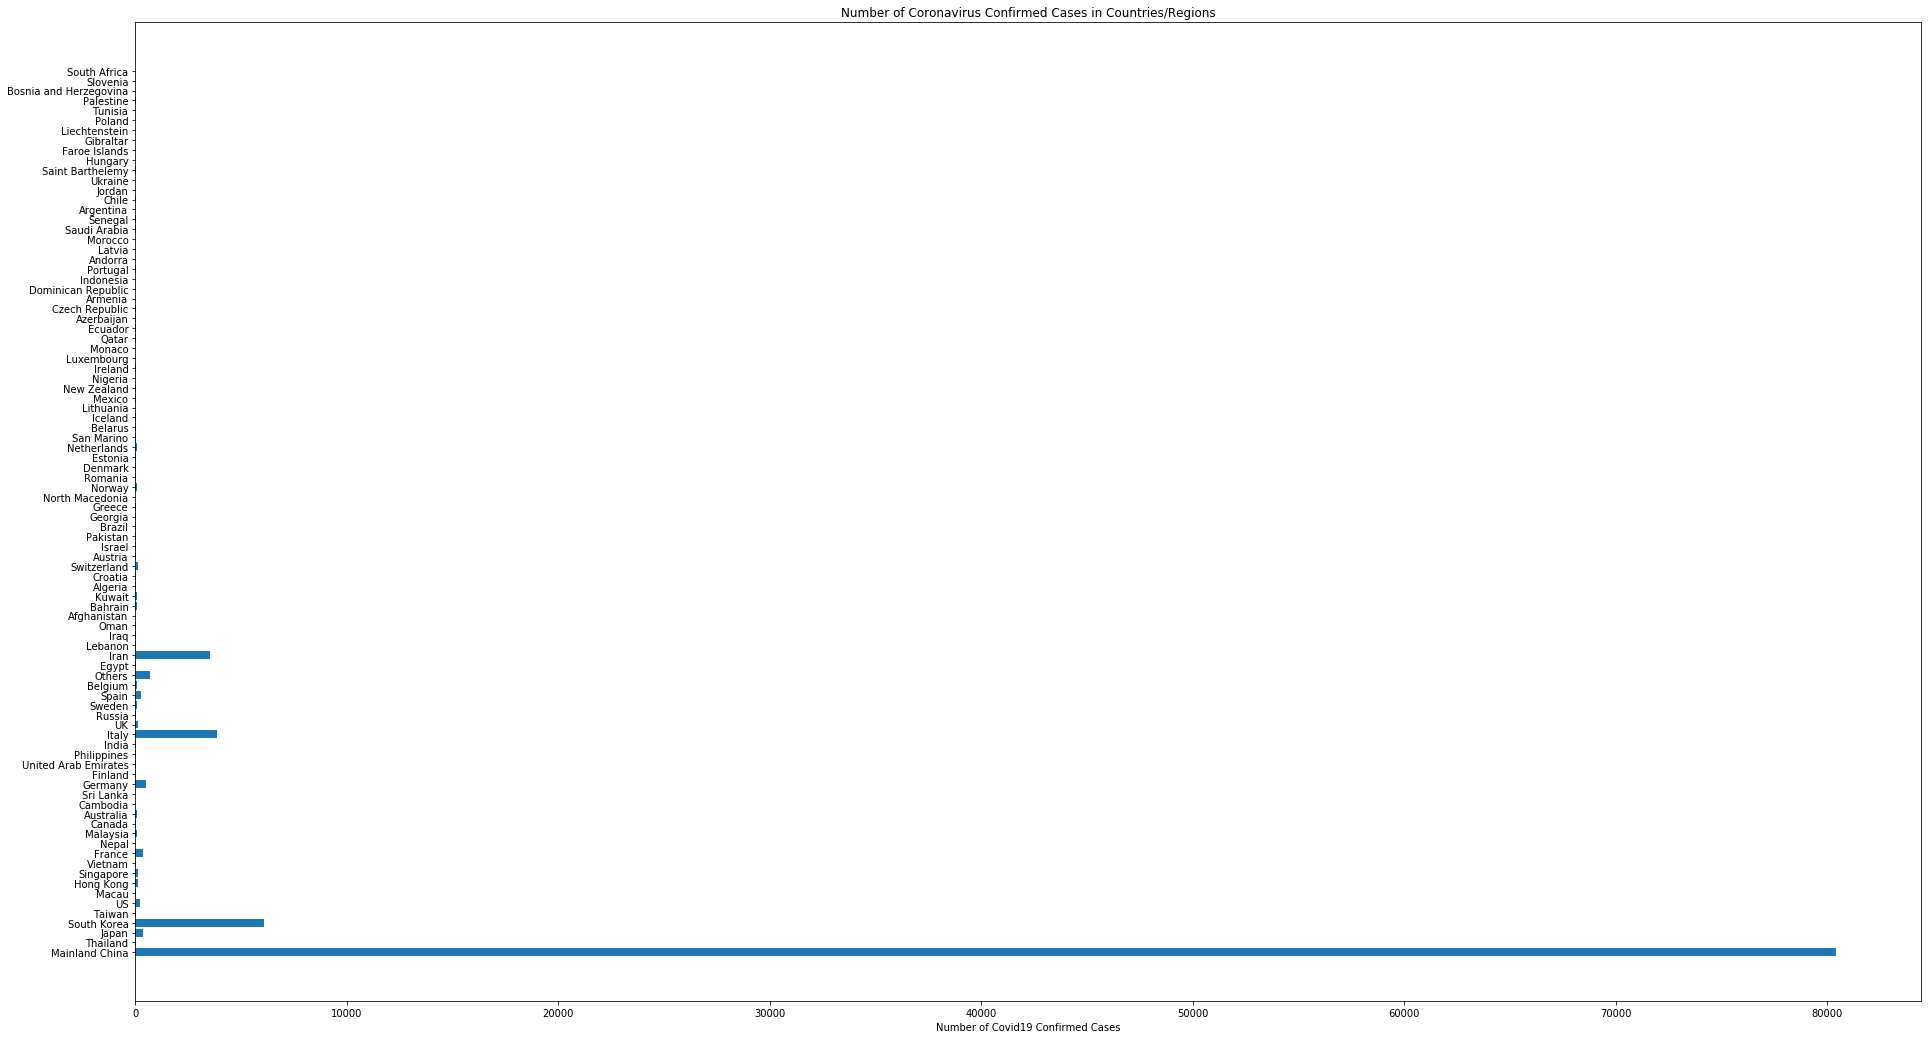

In [224]:
plt.figure(figsize=(32, 18))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Coronavirus Confirmed Cases in Countries/Regions')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

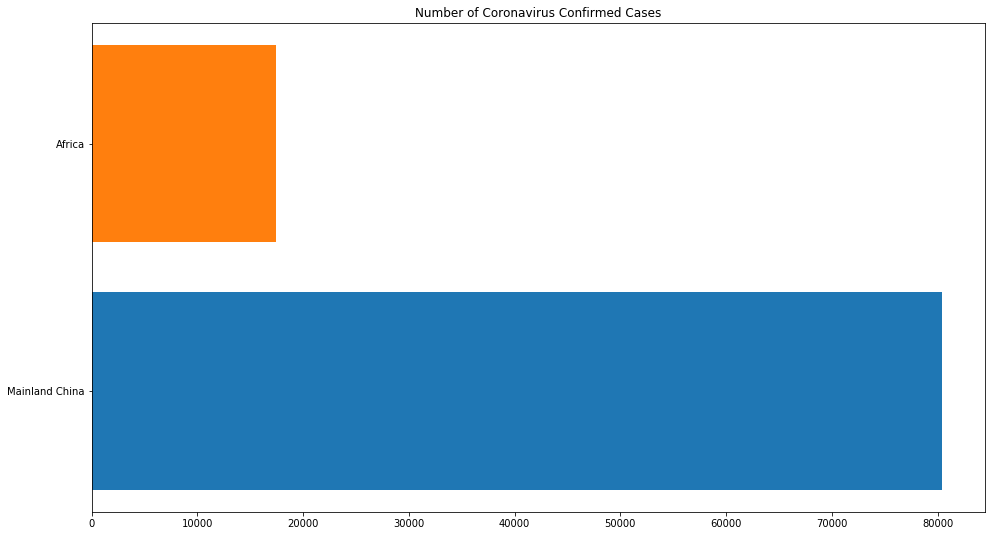

In [227]:
africa_confirmed = np.sum(country_confirmed_cases[1:])
plt.figure(figsize=(16, 9))
plt.barh(unique_countries[0], country_confirmed_cases[0])
plt.barh('Africa', africa_confirmed)
plt.title('Number of Coronavirus Confirmed Cases')
plt.show()

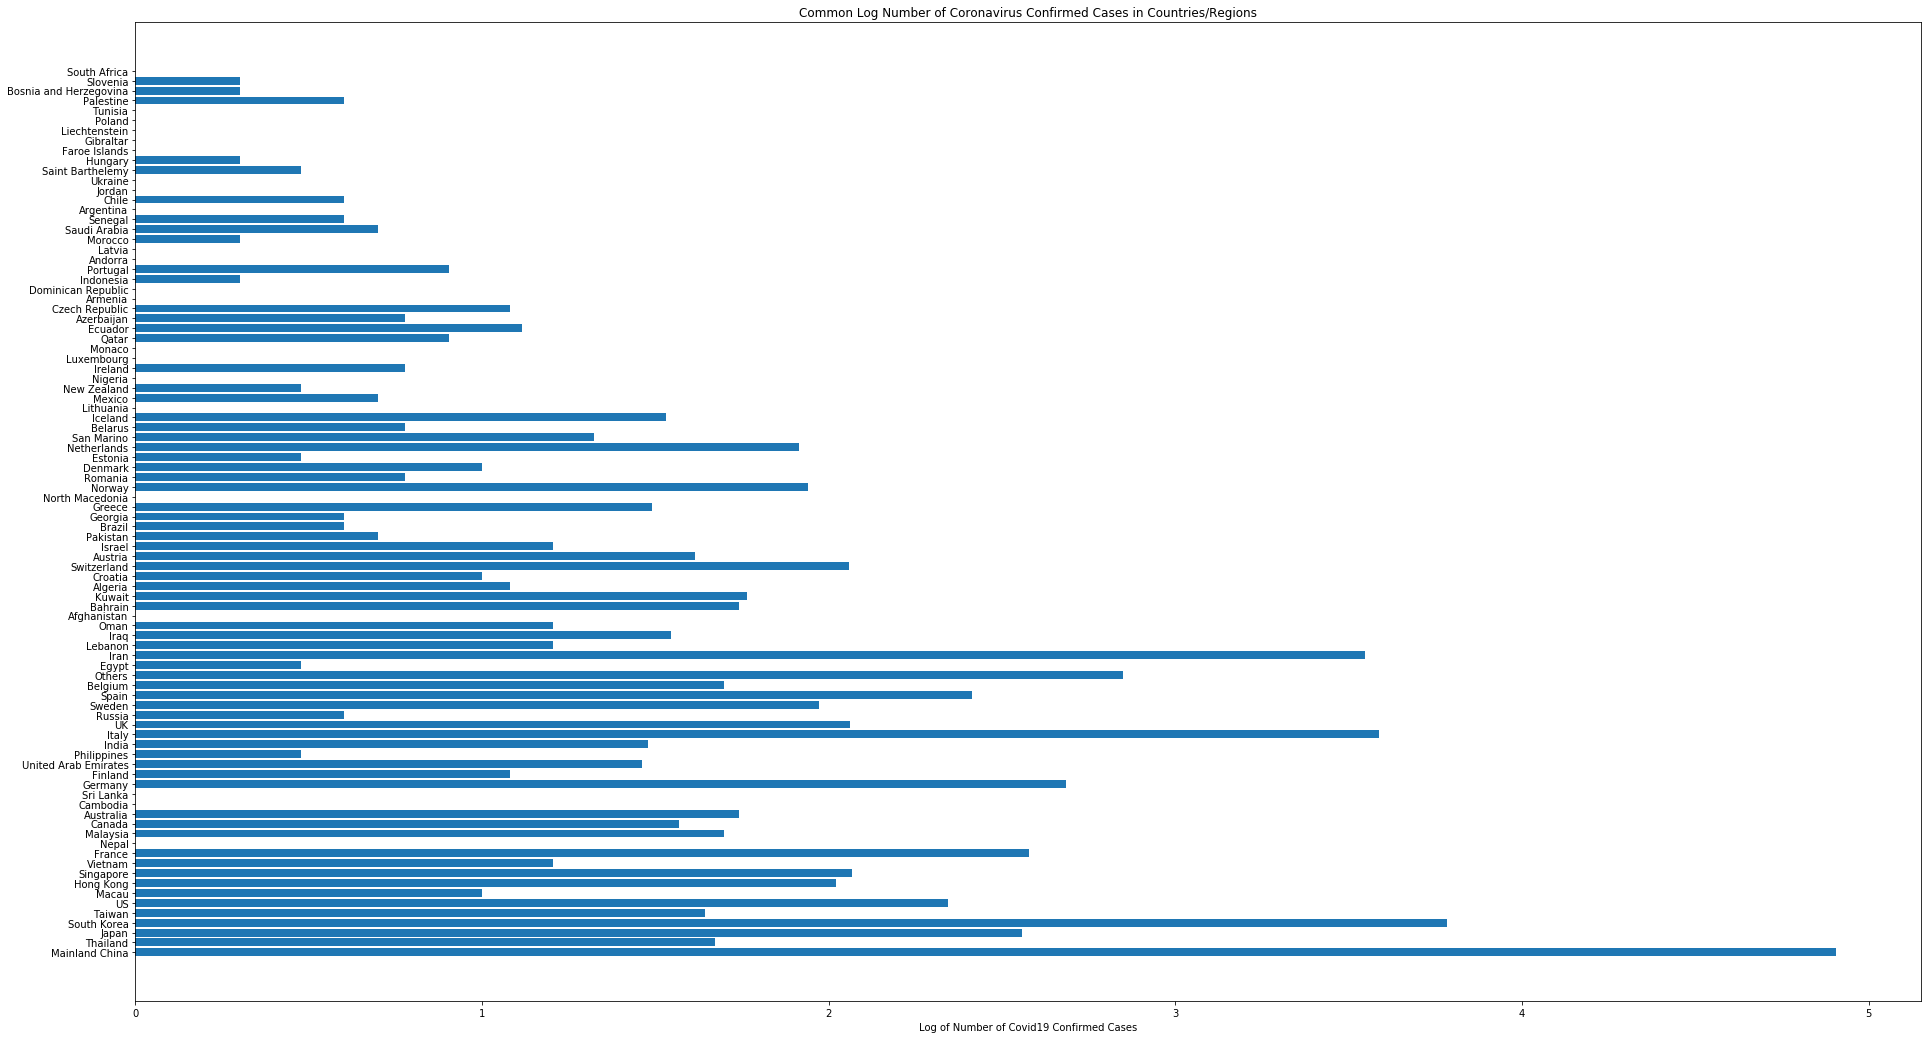

In [228]:
log_country_confirmed_cases = [math.log10(i) for i in country_confirmed_cases]
plt.figure(figsize=(32, 18))
plt.barh(unique_countries, log_country_confirmed_cases)
plt.title('Common Log Number of Coronavirus Confirmed Cases in Countries/Regions')
plt.xlabel('Log of Number of Covid19 Confirmed Cases')
plt.show()

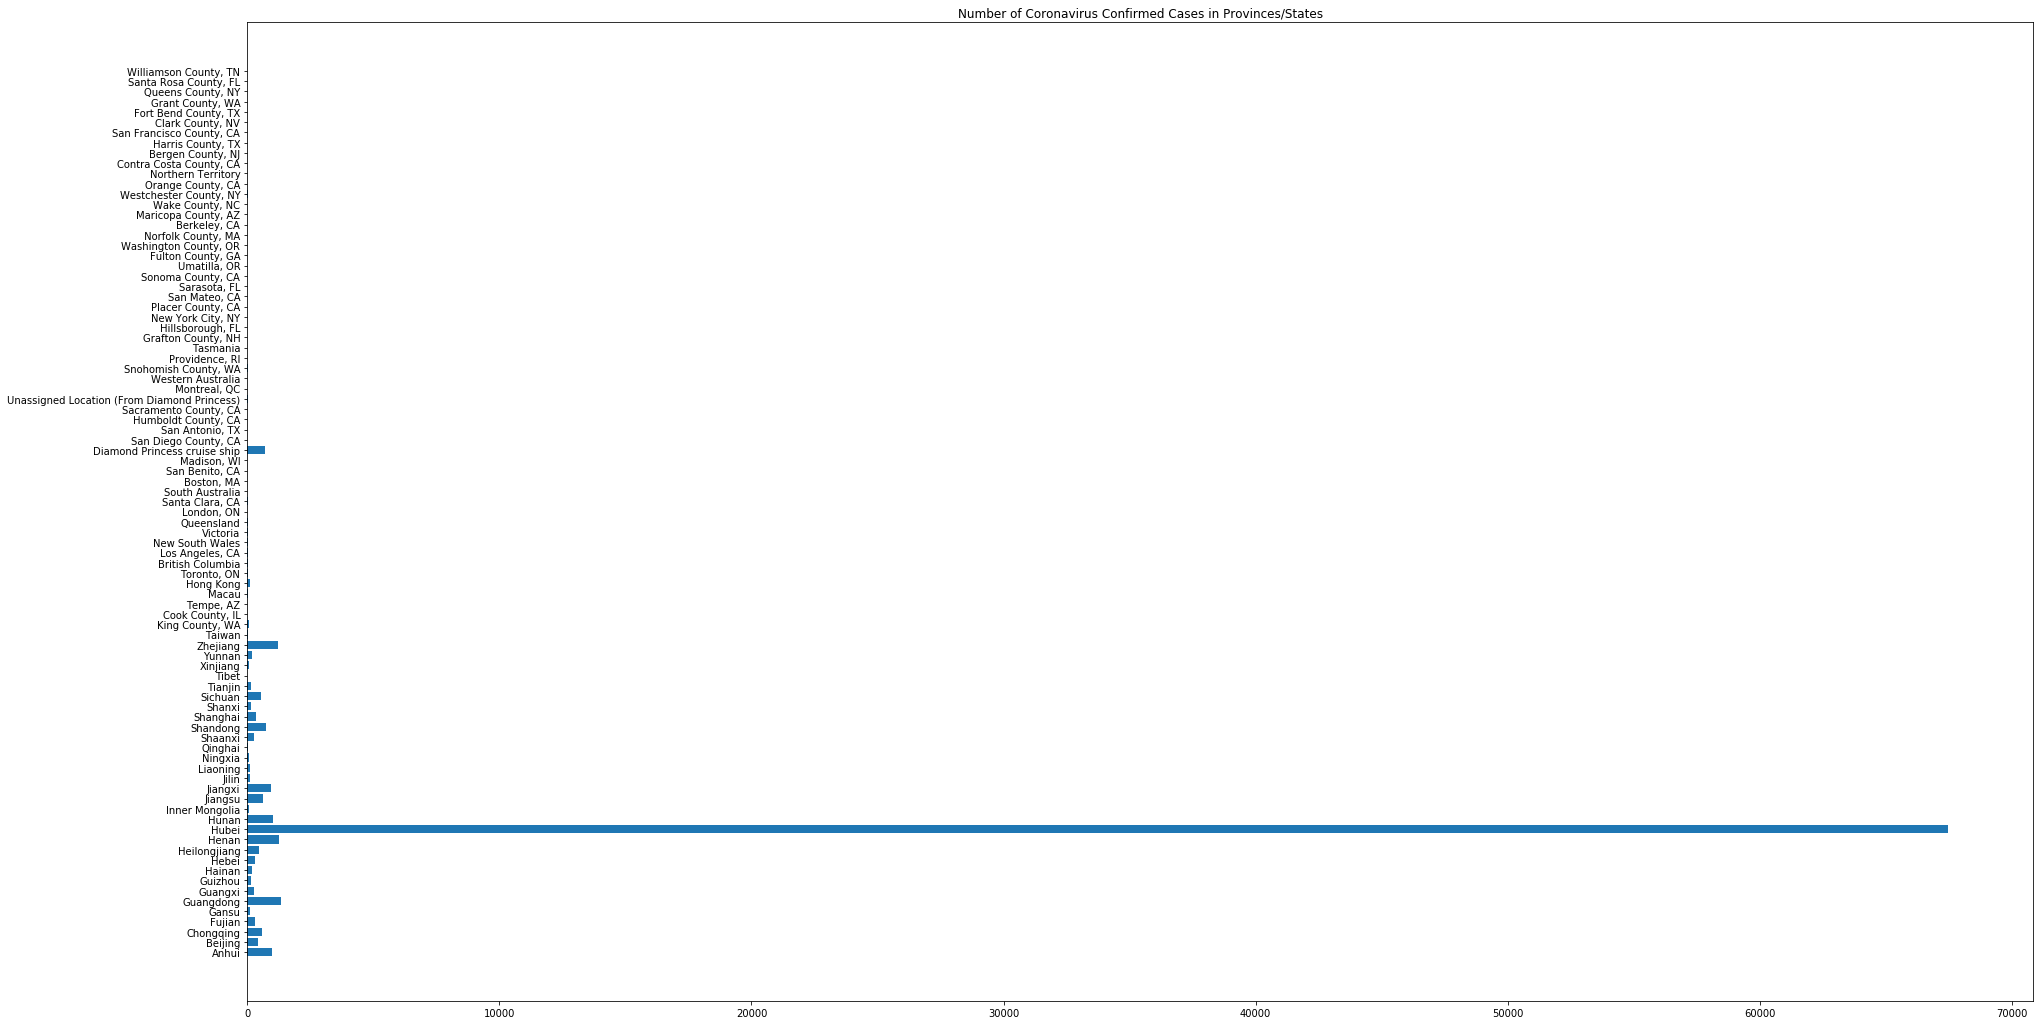

In [229]:
plt.figure(figsize=(32, 18))
plt.barh(unique_provinces, province_confirmed_cases)
plt.title('Number of Coronavirus Confirmed Cases in Provinces/States')
plt.show()


In [0]:
import matplotlib.colors as mcolors

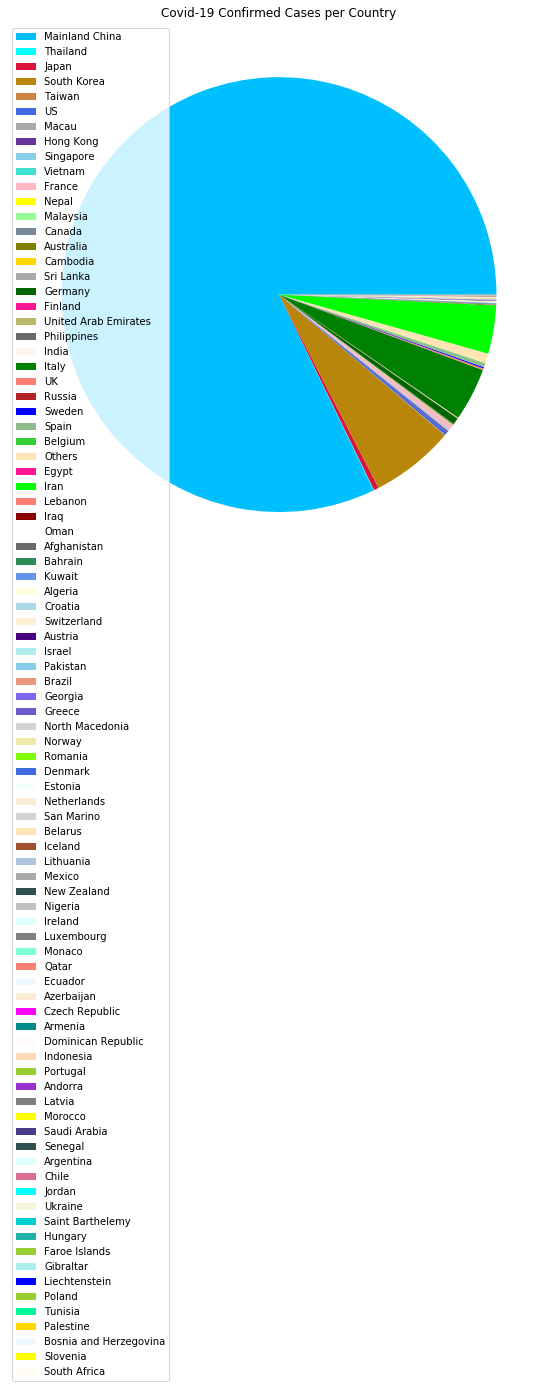

In [232]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,10))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(country_confirmed_cases, colors=c)
plt.legend(unique_countries, loc='best')
plt.show()